\begin{center}
Gabe Morris
\end{center}

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Latex

plt.style.use('maroon.mplstyle')

display_latex = lambda text: display(Latex(text))

def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sp.Number)})

\pagebreak
\tableofcontents
\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6233 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 1
## Given

![Figure 1](images/Figure_1.PNG)

$P=150\,lb$, $L=5\,in$, $H=2\,in$, $t=0.5\,in$, $E=30\cdot10^6\,psi$, and $\nu=0.30$. The angle of $P$ is assumed to be $45^\circ$.

**Notice that the global nodes have been rearranged.** This was done to make the mapping easier.

## Find
a. The global stiffness matrix
b. The displacements at each node
c. The stresses within each element
d. Plot the undeformed and deformed shape

## Solution
For the first element,

![Figure 2](images/Figure_2.PNG)

$\delta_1=\delta_2=\delta_5=0$ \
$\delta_3=u_2$ \
$\delta_4=v_2$ \
$\delta_6=v_3$

For the second element,

![Figure 3](images/Figure_3.PNG)

$\delta_3=0$ \
$\delta_1=u_2$ \
$\delta_2=v_2$ \
$\delta_4=v_3$ \
$\delta_5=u_4$ \
$\delta_6=v_4$

The global displacements are,

![Figure 4](images/Figure_4.PNG)

### Part A

In [2]:
# Define numerical inputs here
P_ = 150
L_, H_ = 5, 2
t_ = 0.5
E_, nu_ = 30e6, 0.3

# Define local coordinates for each element
x1 = [0, L_, 0]
y1 = [0, 0, H_]

x2 = [L_, 0, L_]
y2 = [0, H_, H_]

# The area
A_1 = ((x1[1] - x1[0])*(y1[2] - y1[0]) - (x1[2] - x1[0])*(y1[1] - y1[0]))/2
A_2 = -1*((x2[1] - x2[0])*(y2[2] - y2[0]) - (x2[2] - x2[0])*(y2[1] - y2[0]))/2
A_1, A_2

(5.0, 5.0)

In [3]:
# Define a symbolic B
A, y_23, y_31, y_12, x_32, x_13, x_21 = sp.symbols('A y_{23} y_{31} y_{12} x_{32} x_{13} x_{21}')
B = 1/(2*A)*sp.Matrix([
    [y_23, 0, y_31, 0, y_12, 0],
    [0, x_32, 0, x_13, 0, x_21],
    [x_32, y_23, x_13, y_31, x_21, y_12]
])
B

Matrix([
[y_{23}/(2*A),            0, y_{31}/(2*A),            0, y_{12}/(2*A),            0],
[           0, x_{32}/(2*A),            0, x_{13}/(2*A),            0, x_{21}/(2*A)],
[x_{32}/(2*A), y_{23}/(2*A), x_{13}/(2*A), y_{31}/(2*A), x_{21}/(2*A), y_{12}/(2*A)]])

In [4]:
# Numeric B
# Remember that indices start at 0
B1 = B.subs([
    (A, A_1),
    (y_23, y1[1] - y1[2]),
    (y_31, y1[2] - y1[0]),
    (y_12, y1[0] - y1[1]),
    (x_32, x1[2] - x1[1]),
    (x_13, x1[0] - x1[2]),
    (x_21, x1[1] - x1[0])
])
B1

Matrix([
[-0.2,    0, 0.2,   0,   0,   0],
[   0, -0.5,   0,   0,   0, 0.5],
[-0.5, -0.2,   0, 0.2, 0.5,   0]])

In [5]:
B2 = B.subs([
    (A, A_2),
    (y_23, y2[1] - y2[2]),
    (y_31, y2[2] - y2[0]),
    (y_12, y2[0] - y2[1]),
    (x_32, x2[2] - x2[1]),
    (x_13, x2[0] - x2[2]),
    (x_21, x2[1] - x2[0])
])
B2

Matrix([
[  0,   0, 0.2,   0, -0.2,    0],
[  0, 0.5,   0,   0,    0, -0.5],
[0.5,   0,   0, 0.2, -0.5, -0.2]])

In [6]:
E = E_/(1 - nu_**2)*sp.Matrix([
    [1, nu_, 0],
    [nu_, 1, 0],
    [0, 0, (1 - nu_)/2]
])
round_expr(E, 3)

Matrix([
[32967032.967,   9890109.89,            0],
[  9890109.89, 32967032.967,            0],
[           0,            0, 11538461.538]])

In [7]:
k1_local = t_*A_1*sp.transpose(B1)*E*B1
round_expr(k1_local, 3)

Matrix([
[10508241.758,   5357142.857, -3296703.297, -2884615.385, -7211538.462,  -2472527.473],
[ 5357142.857,  21758241.758, -2472527.473, -1153846.154, -2884615.385, -20604395.604],
[-3296703.297,  -2472527.473,  3296703.297,            0,            0,   2472527.473],
[-2884615.385,  -1153846.154,            0,  1153846.154,  2884615.385,             0],
[-7211538.462,  -2884615.385,            0,  2884615.385,  7211538.462,             0],
[-2472527.473, -20604395.604,  2472527.473,            0,            0,  20604395.604]])

In [8]:
k2_local = t_*A_2*sp.transpose(B2)*E*B2
round_expr(k2_local, 3)

Matrix([
[ 7211538.462,             0,            0,  2884615.385, -7211538.462,  -2884615.385],
[           0,  20604395.604,  2472527.473,            0, -2472527.473, -20604395.604],
[           0,   2472527.473,  3296703.297,            0, -3296703.297,  -2472527.473],
[ 2884615.385,             0,            0,  1153846.154, -2884615.385,  -1153846.154],
[-7211538.462,  -2472527.473, -3296703.297, -2884615.385, 10508241.758,   5357142.857],
[-2884615.385, -20604395.604, -2472527.473, -1153846.154,  5357142.857,  21758241.758]])

In [9]:
k1_global = k1_local.col_insert(6, sp.zeros(rows=6, cols=2)).row_insert(6, sp.zeros(rows=2, cols=8))
round_expr(k1_global, 3)

Matrix([
[10508241.758,   5357142.857, -3296703.297, -2884615.385, -7211538.462,  -2472527.473, 0, 0],
[ 5357142.857,  21758241.758, -2472527.473, -1153846.154, -2884615.385, -20604395.604, 0, 0],
[-3296703.297,  -2472527.473,  3296703.297,            0,            0,   2472527.473, 0, 0],
[-2884615.385,  -1153846.154,            0,  1153846.154,  2884615.385,             0, 0, 0],
[-7211538.462,  -2884615.385,            0,  2884615.385,  7211538.462,             0, 0, 0],
[-2472527.473, -20604395.604,  2472527.473,            0,            0,  20604395.604, 0, 0],
[           0,             0,            0,            0,            0,             0, 0, 0],
[           0,             0,            0,            0,            0,             0, 0, 0]])

In [10]:
k2_global = k2_local.col_insert(0, sp.zeros(rows=6, cols=2)).row_insert(0, sp.zeros(rows=2, cols=8))
round_expr(k2_global, 3)

Matrix([
[0, 0,            0,             0,            0,            0,            0,             0],
[0, 0,            0,             0,            0,            0,            0,             0],
[0, 0,  7211538.462,             0,            0,  2884615.385, -7211538.462,  -2884615.385],
[0, 0,            0,  20604395.604,  2472527.473,            0, -2472527.473, -20604395.604],
[0, 0,            0,   2472527.473,  3296703.297,            0, -3296703.297,  -2472527.473],
[0, 0,  2884615.385,             0,            0,  1153846.154, -2884615.385,  -1153846.154],
[0, 0, -7211538.462,  -2472527.473, -3296703.297, -2884615.385, 10508241.758,   5357142.857],
[0, 0, -2884615.385, -20604395.604, -2472527.473, -1153846.154,  5357142.857,  21758241.758]])

In [11]:
k_global = k1_global + k2_global
round_expr(k_global, 1)

Matrix([
[10508241.8,   5357142.9, -3296703.3,  -2884615.4, -7211538.5,  -2472527.5,          0,           0],
[ 5357142.9,  21758241.8, -2472527.5,  -1153846.2, -2884615.4, -20604395.6,          0,           0],
[-3296703.3,  -2472527.5, 10508241.8,           0,          0,   5357142.9, -7211538.5,  -2884615.4],
[-2884615.4,  -1153846.2,          0,  21758241.8,  5357142.9,           0, -2472527.5, -20604395.6],
[-7211538.5,  -2884615.4,          0,   5357142.9, 10508241.8,           0, -3296703.3,  -2472527.5],
[-2472527.5, -20604395.6,  5357142.9,           0,          0,  21758241.8, -2884615.4,  -1153846.2],
[         0,           0, -7211538.5,  -2472527.5, -3296703.3,  -2884615.4, 10508241.8,   5357142.9],
[         0,           0, -2884615.4, -20604395.6, -2472527.5,  -1153846.2,  5357142.9,  21758241.8]])

### Part B

In [12]:
F_1, F_2, F_5 = sp.symbols('F_1 F_2 F_5')
F = sp.Matrix([
    [F_1],
    [F_2],
    [0],
    [0],
    [F_5],
    [0],
    [P_*sp.sqrt(2)/2],
    [P_*sp.sqrt(2)/2]
]).n()
F

Matrix([
[             F_1],
[             F_2],
[               0],
[               0],
[             F_5],
[               0],
[106.066017177982],
[106.066017177982]])

In [13]:
u2, v2, v3, u4, v4 = sp.symbols('u_2 v_2 v_3 u_4 v_4')
d = sp.Matrix([
    [0],
    [0],
    [u2],
    [v2],
    [0],
    [v3],
    [u4],
    [v4]
])
d

Matrix([
[  0],
[  0],
[u_2],
[v_2],
[  0],
[v_3],
[u_4],
[v_4]])

In [14]:
system = sp.Eq(F, k_global*d)
round_expr(system, 3)

Eq(Matrix([
[    F_1],
[    F_2],
[      0],
[      0],
[    F_5],
[      0],
[106.066],
[106.066]]), Matrix([
[                                      -3296703.297*u_2 - 2884615.385*v_2 - 2472527.473*v_3],
[                                     -2472527.473*u_2 - 1153846.154*v_2 - 20604395.604*v_3],
[                    10508241.758*u_2 - 7211538.462*u_4 + 5357142.857*v_3 - 2884615.385*v_4],
[                                    -2472527.473*u_4 + 21758241.758*v_2 - 20604395.604*v_4],
[                                      -3296703.297*u_4 + 5357142.857*v_2 - 2472527.473*v_4],
[                    5357142.857*u_2 - 2884615.385*u_4 + 21758241.758*v_3 - 1153846.154*v_4],
[ -7211538.462*u_2 + 10508241.758*u_4 - 2472527.473*v_2 - 2884615.385*v_3 + 5357142.857*v_4],
[-2884615.385*u_2 + 5357142.857*u_4 - 20604395.604*v_2 - 1153846.154*v_3 + 21758241.758*v_4]]))

In [15]:
solved = sp.solve(system)
for key, value in solved.items():
    display_latex(f'${sp.latex(key)}={sp.latex(value)}$')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Part C

In [16]:
strain1 = B1*sp.Matrix([
    [0],
    [0],
    [solved[u2]],
    [solved[v2]],
    [0],
    [solved[v3]]
])
strain1

Matrix([
[ 4.84263046007354e-6],
[-7.12151538246102e-7],
[ 1.30945077410208e-5]])

In [17]:
stress1 = E*strain1
stress1

Matrix([
[152.603901052738],
[24.4166241684383],
[151.090473934855]])

In [18]:
strain2 = B2*sp.Matrix([
    [solved[u2]],
    [solved[v2]],
    [0],
    [solved[v3]],
    [solved[u4]],
    [solved[v4]]
])
strain2

Matrix([
[-1.37990921436797e-6],
[-1.41925831943259e-6],
[-5.29026856982834e-6]])

In [19]:
stress2 = E*strain2
stress2

Matrix([
[-59.5281333032225],
[-60.4361895739445],
[-61.0415604210962]])

### Part D
Here is a plot of the deformed shape.

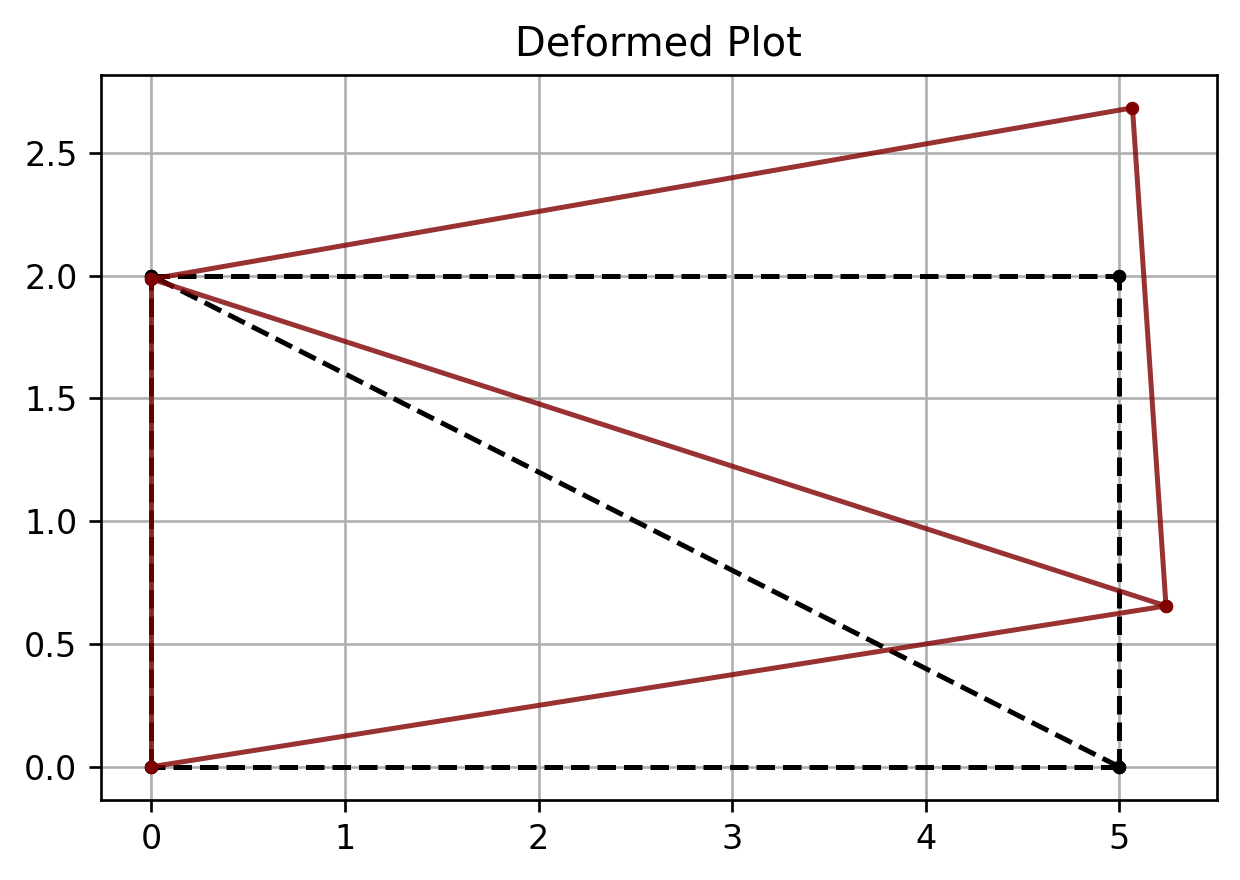

In [20]:
undeformed = {'color': 'black', 'ls': '--', 'label': 'undeformed', 'marker': '.'}
deformed = {'color': 'maroon', 'label': 'deformed', 'marker': '.', 'alpha': 0.8}
s_ = 10_000  # How exaggerated the results are going to be

plt.plot([0, 0], [0, H_], [L_, 0], [0, 0], [L_, 0], [0, H_], [L_, L_], [0, H_], [0, L_], [H_, H_], **undeformed)
plt.plot([0, 0], [0, H_ + s_*solved[v3]], [0, L_ + s_*solved[u2]], [0, s_*solved[v2]], [0, L_ + s_*solved[u2]], [H_ + s_*solved[v3], s_*solved[v2]], [L_ + s_*solved[u4], 0], [H_ + s_*solved[v4], H_ + s_*solved[v3]], [L_ + s_*solved[u2], L_ + s_*solved[u4]], [s_*solved[v2], H_ + s_*solved[v4]], **deformed)
plt.title('Deformed Plot')
plt.show()

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6233 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 2
## Given

![Figure 6](images/Figure_7.PNG)

## Find
a. The stress concentration factor if $\frac{d}{w}=0.2$.
b. Does the stress concentration factor change with increasing number of elements? Confirm or deny with three different mesh densities.
c. Compare the FE solution with a theoretical stress concentration factor (provide references and supporting material).
d. Discuss the mesh used in these simulations including the element type(s) used, why they were chosen, and how they affected the result.

## Solution
The part that I created has the parameters,

$d=8\,mm$, $w=40\,mm$, $L=40\,mm$, and $\frac{d}{w}=0.2$

The material properties are,

$E=69,000\,MPa$ and $\nu=0.35$ (Aluminum)

The load is,

$P=5\,MPa$

The part has a small thickness of 2 mm. Here are the loads,

![Figure 7](images/Figure_6.PNG)

The boundary conditions allow for motion in the U1 direction.

### Part A

Using a 2 mm mesh with a C3D10 element type,

![Figure 8](images/Figure_8.PNG)

The stress concentration may have several definitions, but for our case, let's say that the stress concentration is the maximum stress divided by the nominal stress. For this 2 mm mesh,

$\frac{\sigma_{max}}{\sigma_{nom}}=\frac{13.19\,MPa}{5\,MPa}=2.638$

### Part B

Using a mesh size of 1 mm,

![Figure 9](images/Figure_9.PNG)

The stress concentration factor increased to a value of $\frac{13.73\,MPa}{5\,MPa}=2.746$.

Using a mesh size of 0.75 mm,

![Figure 10](images/Figure_10.PNG)

The stress concentration factor increased further to a value of $\frac{13.84\,MPa}{5\,MPa}=2.768$.

### Part C
According to this figure found in *Mechanics of Materials* by R.C. Hibbeler,

![Figure 11](images/Figure_11.PNG)

The theoretical value should be around 2.45. This value is less than the value from the FEA results.

### Part D

| Mesh Size (mm) | Stress Concentration |
|----------------|----------------------|
| 2              | 2.638                |
| 1              | 2.746                |
| 0.75           | 2.768                |

The element used was C3D10 (tetrahedral) because it is a worthy representative for general purpose application. As seen in the table above, as the mesh size decreases (more elements), the stress concentration factor increases. The value has some significant deviation from the theoretical value. This could be due to the way in which the stress concentration factor is defined. That graph defines the stress concentration factor as the ratio of the maximum stress to the average stress across the central cross-section. The average stress for our case, would be greater than $5\,MPa$, meaning that the FEA results could agree more with the theoretical value had I used the average instead.

\pagebreak

\begin{center}
\begin{tabular}{c c c}
ME 6233 & Homework 2 & Gabe Morris \\
& & gnm54
\end{tabular}
\end{center}

# Problem 3
## Given
[Use of Finite Element Analysis to Predict Type of Bone Fractures and Fracture Risks in Femur due to Osteoporosis](https://www.longdom.org/abstract/use-of-finite-element-analysis-to-predict-type-of-bone-fractures-and-fracture-risks-in-femur-due-to-osteoporosis-14757.html)

## Find
a. Description of the FE model and methods
b. Details about any assumptions associated with the methods and/or model
c. What were the main results of this article? How would you improve the results section?
d. What changes could (or should) be made to the model to make the results more realistic?

## Solution
There are not many details about the FE model. The complex geometry of the femur bone made it difficult for them to create a mesh. There are no details about the mesh or the element type. However, the load applied is static, and a specific loading of 2317 N is used because it is the maximum load for a person standing on one foot. There are no additional details about the boundary conditions. I am lead to assume that the bone is fixed on the ends.

There are not many assumptions given other than the material properties of the bone. The elastic modulus varies with the age and is given in Figure 5. There is no additional information given regarding the assumptions of the model.

The results showed that the values of the stress increased as a person ages. Interestingly enough, at age 67, the maximum stress values occurred at a very different location compared to the other ages specified. I wish they had further elaborated on why that was the case. The analysis also covers the relationship between the T-score and stress. T-score is the relative bone density to that of a normal 30-year-old person. Their conclusion for the relationship between bone material density and stress was that they could use FEA as a worthy approach to determine the bone mineral density and the fracture risk.

I believe that they could've discussed more about the FEA model, specifically the assumptions and boundary conditions. I think they could've been more realistic about the load such as simulating an impact rather than a non-existent point load. They did do a good job of visualization, but could have elaborated on some of them. One in particular is the load for the 67-year-old. Why did the maximum stress occur in that location?